In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Tax')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df =pd.read_csv('Tax_Revenue_Datasets.csv')

In [ ]:
df.head()

,Type,Tax Category,Tax Sub Category,Tax Particular,Major Head,Actual 2017-2018,Budget 2018-2019,Revised 2018-2019,Budget 2019-2020
0,Tax Revenue,Corporation Tax,NaN,Collections,20,486113.18,527750.39,575795.77,652168.08
1,Tax Revenue,Corporation Tax,NaN,Surcharge,20,21439.48,63711.15,64777.02,73368.91
2,Tax Revenue,Corporation Tax,NaN,Education Cess,20,16305.02,29538.46,30427.21,34463.01
3,Tax Revenue,Corporation Tax,NaN,Penalties,20,1526.86,0.00,0.00,0.00
4,Tax Revenue,Corporation Tax,NaN,Interest Recoveries,20,3209.30,0.00,0.00,0.00


In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt 

In [ ]:
df['Tax Category'].unique()

array(['Corporation Tax', 'Taxes on Income', 'Wealth Tax', 'Customs',
       'Union Excise Duties', 'Service Tax',
       'Other Taxes and Duties on Commodities and Services',
       'Goods and Services Tax (GST)', 'Taxes of Union Territories',
       'Less-NCCD transferred to the National Disaster Response Fund',
       "Less-States' Share",
       "Less-States' share adjustment as per Actual"], dtype=object)

In [ ]:
df['Tax Category'].describe()

count    100.000000
mean       6.610000
std        3.910346
min        0.000000
25%        1.750000
50%        9.000000
75%       10.000000
max       11.000000
Name: Tax Category, dtype: float64

In [ ]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Tax Category']= label_encoder.fit_transform(df['Tax Category'])
 
df['Tax Category'].unique()

array([ 0,  9, 11,  1, 10,  7,  6,  2,  8,  3,  4,  5])

In [ ]:
df['Actual 2017-2018'] = df['Actual 2017-2018'].abs()

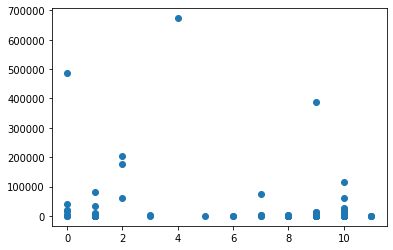

In [ ]:
plt.scatter(df['Tax Category'], df['Actual 2017-2018'])

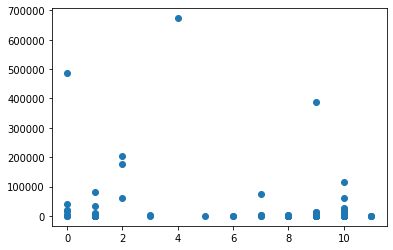

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
plt.scatter(df['Tax Category'], df['Actual 2017-2018'])

In [45]:
km= KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
y_predicted =km.fit_predict(df[['Actual 2017-2018']])
y_predicted

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

In [47]:
df['cluster']= y_predicted

In [48]:
df.head()

,index,Actual 2017-2018,cluster
0,1,486113.18,1
1,2,21439.48,0
2,3,16305.02,0
3,4,1526.86,0
4,5,3209.30,0


IndexError: ignored

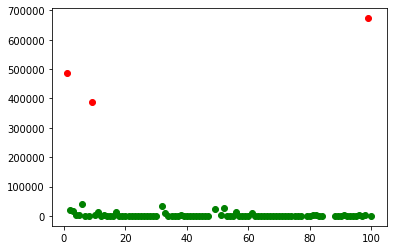

In [49]:
df1=df[df.cluster==0]

df2=df[df.cluster==1]

df3=df[df.cluster==3]




plt.scatter(df1['index'],df1['Actual 2017-2018'],color='green')
plt.scatter(df2['index'],df2['Actual 2017-2018'],color='red')
plt.scatter(df3['index'],df3['Actual 2017-2018'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Different Categories ')
plt.ylabel('Salary')
plt.legend()

In [42]:
df=pd.read_csv('Book.csv')

In [43]:
df['Actual 2017-2018'] = df['Actual 2017-2018'].abs()